# Week 3 Baseline Model: with added features

Refactored code from Week 3 based on mentor feedback
16.06.2020 with added features (HB)

In [23]:
# where am I?
import os
current_path = os.getcwd()
print(current_path)

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\exploration\01_eda_minimal_model


In [24]:
# print working directory again (windows 10)
myinfo = !echo %cd%
print(myinfo)

['C:\\Users\\hanna\\PycharmProjects\\berlindslab\\ds-lab\\exploration\\01_eda_minimal_model']


In [25]:
jupyter lab --notebook-dir C:\\

SyntaxError: invalid syntax (<ipython-input-25-f556cc09a51e>, line 1)

In [1]:
# imports and magic line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from emissionscheck_alb import data_prep, baseline_model


ModuleNotFoundError: No module named 'emissionscheck_alb'

In [2]:
df = pd.read_csv("../data/interim/sample.csv", lineterminator='\n')

/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# get columns for data exploration
df_subset = df[["RecordID", "TEST_SDATE", "TEST_EDATE", "ODOMETER", "VEHICLE_TYPE", "MODEL_YEAR", "FUEL_TYPE", "GVW_TYPE", "OVERALL_RESULT"]]

In [4]:
# get car age
df_subset = data_prep.get_car_age(df_subset)
df_subset.head()

,RecordID,TEST_SDATE,TEST_EDATE,ODOMETER,VEHICLE_TYPE,MODEL_YEAR,FUEL_TYPE,GVW_TYPE,OVERALL_RESULT,CAR_AGE
0,111260,2004-12-16 10:57:00,2004-12-16 11:03:00,53274,3,1994,G,1.0,P,11
1,138031,2004-08-13 14:10:00,2004-08-13 14:12:00,109225,1,2000,G,1.0,P,5
2,298121,2004-08-31 13:03:00,2004-08-31 13:03:00,110347,1,1989,G,1.0,A,16
3,369185,2004-12-02 11:33:00,2004-12-02 11:39:00,152121,4,1985,G,2.0,P,20
4,384955,2004-12-29 17:00:00,2004-12-29 17:03:00,135640,1,1997,G,1.0,P,8


In [5]:
# Keep rows with only P or F in OVERALL RESULT
df_subset = data_prep.keep_pass_fail(df_subset)

In [6]:
df_subset.shape

(346783, 10)

## Remove strange odometer values

In [7]:
# remove odometer values over 400000
df_subset = df_subset[df_subset['ODOMETER']<=400000]

In [8]:
# exclude 0 odometer values
df_subset = df_subset[df_subset['ODOMETER']>0]

In [9]:
df_subset.shape

(344947, 10)

## Encoding target

In [10]:
target = data_prep.encode_target(df_subset["OVERALL_RESULT"])

## Create df of features only

In [11]:
df_features = df_subset[["VEHICLE_TYPE", "FUEL_TYPE", "GVW_TYPE", "ODOMETER", "CAR_AGE"]]

## Logistic Regression

In [12]:
# Continuous and categorical features
cat_features = ["VEHICLE_TYPE", "FUEL_TYPE", "GVW_TYPE"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.95      0.65      0.78     94757
           1       0.15      0.66      0.25      8728

    accuracy                           0.65    103485
   macro avg       0.55      0.66      0.51    103485
weighted avg       0.89      0.65      0.73    103485

ROC AUC Score is 0.709078705996264


/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross-validation scores: [0.71135833 0.70981074 0.71373447 0.71713137 0.71315056]
Mean cross-validation score: 0.71


/home/mdado/anaconda3/envs/dslab/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

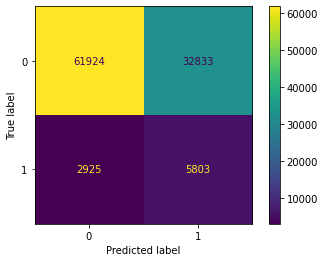

In [13]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced")

              precision    recall  f1-score   support

           0       0.95      0.65      0.78     94757
           1       0.15      0.66      0.24      8728

    accuracy                           0.65    103485
   macro avg       0.55      0.66      0.51    103485
weighted avg       0.89      0.65      0.73    103485

ROC AUC Score is 0.7065077954912061
Cross-validation scores: [0.70956422 0.70809555 0.71190963 0.71502966 0.71253997]
Mean cross-validation score: 0.71


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

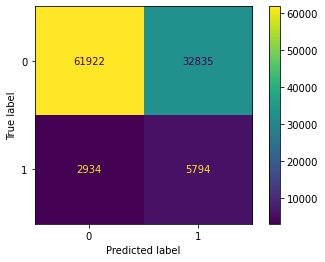

In [15]:
# only continuous features
features_train, features_test, target_train, target_test = data_prep.split_data(features_matrix = df_features[["ODOMETER", "CAR_AGE"]],
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced")